# Group E Assignment 5: NILMTK

## Exercise 1

### Load UKDALE data into memory and print out the metadata

In [2]:
from nilmtk import DataSet
from nilmtk.utils import print_dict
from nilmtk.timeframe import TimeFrame

ukdale = DataSet('./data/ukdale.h5')
print_dict(ukdale.metadata)

#train = DataSet('/path/redd.h5')

### Print out the sub-metered appliances in each building

In [3]:
print_dict(ukdale.buildings)

In [4]:
for build in ukdale.buildings:
    print("Appliances of Building " +str(build))
    print(ukdale.buildings[build].elec)
    print("---")

Appliances of Building 1
MeterGroup(meters=
  ElecMeter(instance=2, building=1, dataset='UK-DALE', appliances=[Appliance(type='boiler', instance=1)])
  ElecMeter(instance=3, building=1, dataset='UK-DALE', appliances=[Appliance(type='solar thermal pumping station', instance=1)])
  ElecMeter(instance=4, building=1, dataset='UK-DALE', appliances=[Appliance(type='laptop computer', instance=1), Appliance(type='laptop computer', instance=3)])
  ElecMeter(instance=5, building=1, dataset='UK-DALE', appliances=[Appliance(type='washer dryer', instance=1)])
  ElecMeter(instance=6, building=1, dataset='UK-DALE', appliances=[Appliance(type='dish washer', instance=1)])
  ElecMeter(instance=7, building=1, dataset='UK-DALE', appliances=[Appliance(type='television', instance=1)])
  ElecMeter(instance=8, building=1, dataset='UK-DALE', appliances=[Appliance(type='light', instance=1), Appliance(type='light', instance=2)])
  ElecMeter(instance=9, building=1, dataset='UK-DALE', appliances=[Appliance(type='H

In [6]:
elec = ukdale.buildings[1].elec

In [35]:
elec.total_energy()

Calculating total_energy for ElecMeterID(instance=54, building=1, dataset='UK-DALE') ...   

apparent   NaN
dtype: float64

In [8]:
elec.submeters().total_energy()

Calculating total_energy for ElecMeterID(instance=53, building=1, dataset='UK-DALE') ...    total_energy for ElecMeterID(instance=17, building=1, dataset='UK-DALE') ...   total_energy for ElecMeterID(instance=44, building=1, dataset='UK-DALE') ...   

apparent   NaN
dtype: float64

### Calculate the total energy consumption for building 1 in kWh

In [36]:
elec.mains().total_energy()

apparent    6.354473
active      5.431495
dtype: float64

### Print out the type of power for mains and sub-meters (apparent, active, or reactive)

In [37]:
elec.mains().available_ac_types('power')

['active', 'apparent']

In [38]:
elec.submeters().available_ac_types('power')

['active', 'apparent']

## Exercise 2

### Select and plot the power that is used by the following appliances of building 1 for start='2014-04-28' and end='2014-04-29'

In [25]:
ukdale_window = DataSet('./data/ukdale.h5')
ukdale_window.set_window(start='2014-04-28', end='2014-04-29')

fridge_meter = ukdale_window.buildings[1].elec['fridge freezer']
light_meter = ukdale_window.buildings[1].elec['light']

/Users/hardanimaulana/anaconda2/envs/nilmtk-env/lib/python3.6/site-packages/nilmtk/elecmeter.py:189: RuntimeWarning: Multiple appliances are associated with meter {} but none are marked as the dominant appliance. Hence returning the first appliance in the list.
  ' returning the first appliance in the list.', RuntimeWarning)


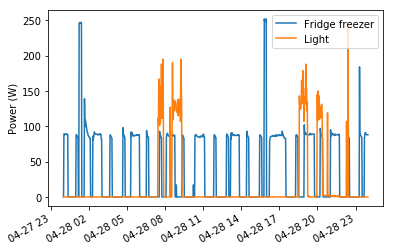

In [30]:
fridge_meter.plot()
light_meter.plot()

In [39]:
all_window = next(ukdale_window.buildings[1].elec.load())
all_window.head()

Loading data for meter ElecMeterID(instance=54, building=1, dataset='UK-DALE')     
Done loading data all meters for this chunk.


physical_quantity,power,voltage,power
type,apparent,,active
2014-04-28 00:00:00+01:00,NaN,NaN,4.000000
2014-04-28 00:00:06+01:00,241.339996,241.539993,229.830002
2014-04-28 00:00:12+01:00,241.289993,241.460007,321.580017
2014-04-28 00:00:18+01:00,241.220001,241.570007,321.570007
2014-04-28 00:00:24+01:00,241.529999,241.669998,322.640015


In [59]:
all_window['voltage'=='NaN']=0

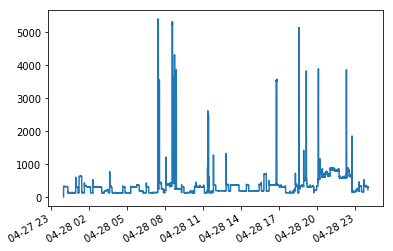

In [60]:
all_window['power']['active'].plot()